Code permettant d'afficher des graphiques de Data visualisation

Mounted at /content/gdrive


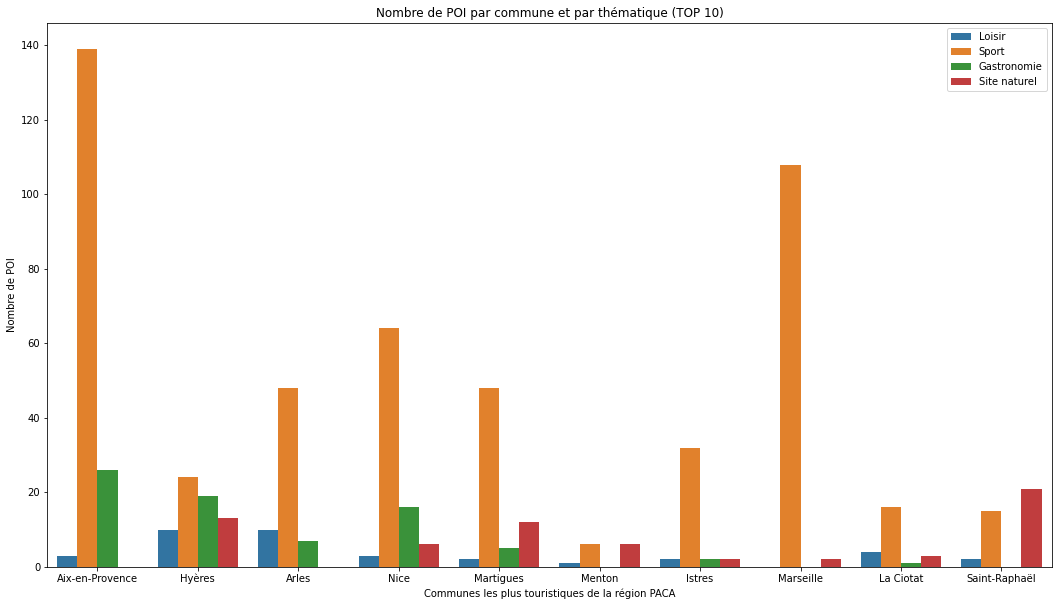

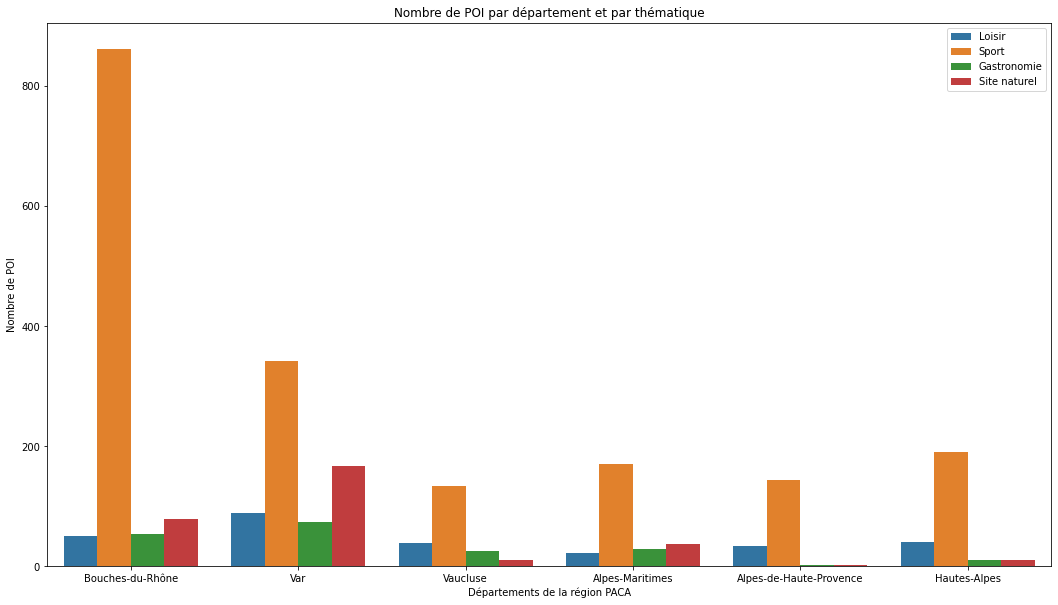

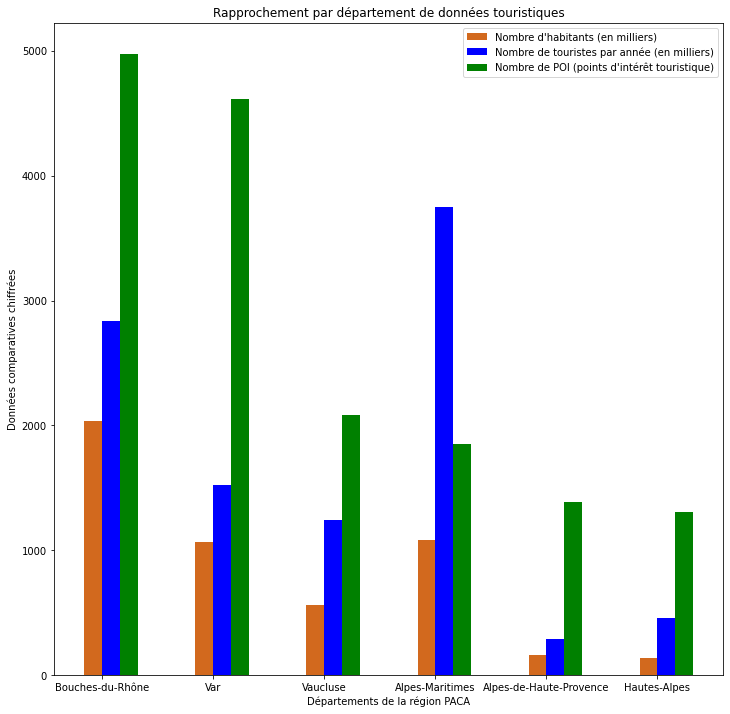

In [1]:
from IPython.core.display import display, HTML                                     ## élargissement de la fenêtre JUPYTER à 90% de son maximum 
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from google.colab import drive
drive.mount('/content/gdrive')

##-----------------------------------------------------------------------------------------
##  Graphique affichant le TOP TEN des communes de la région PACA proposant le plus de POI
##-----------------------------------------------------------------------------------------

df_POI = pd.read_csv("/content/gdrive/MyDrive/Datascientest - Pytineo/0 - Projet_finalisé/datatourisme.POI_OK_20210921.PACA.csv")

dict_nbre_POI = df_POI['Nom_commune'].value_counts().to_dict()                     ## création d'un dictionnaire contenant les communes et leur nombre de POI respectifs (trié par nombre de POI)
liste_POI_communes_top_ten = list(dict_nbre_POI.keys())[:10]                       ## limitation du dictionnaire (transformé en liste) au TOP 10 des communes 

liste_toutes_thematiques_POI = ['Commerce', 'Culture', 'Évènement culturel', 'Évènement social', 'Gastronomie', 'Information',
                                'Itinéraire cyclable', 'Itinéraire équestre', 'Itinéraire fluvial ou maritime', 'Itinéraire pédestre',
                                'Itinéraire routier', 'Itinéraire sous-marin', 'Loisir', 'Mobilité', 'Restauration', 'Service pratique',
                                'Site naturel', 'Sport']

liste_thematiques_POI_touristiques = ['Culture', 'Évènement culturel', 'Évènement social', 'Gastronomie', 'Itinéraire cyclable',
                                      'Itinéraire équestre', 'Itinéraire fluvial ou maritime', 'Itinéraire pédestre', 'Itinéraire routier',
                                      'Itinéraire sous-marin', 'Loisir', 'Service pratique', 'Site naturel', 'Sport']

plt.figure(figsize= (18, 10))

## instanciation d'un diagramme COUNTPLOT affichant les 10 communes de la région PACA proposant le plus de POI 
sns.countplot(x='Nom_commune', hue='Thématique_POI', order=liste_POI_communes_top_ten, data=df_POI[df_POI['Nom_commune'].isin(liste_POI_communes_top_ten)
                                                                                                 & df_POI['Thématique_POI'].isin(liste_thematiques_POI_touristiques)]);

plt.title('Nombre de POI par commune et par thématique (TOP 10)')  
plt.xlabel('Communes les plus touristiques de la région PACA')  
plt.ylabel('Nombre de POI')
plt.legend(loc='upper right')

plt.savefig('/content/gdrive/MyDrive/Datascientest - Pytineo/Fichiers divers/Fichiers sortants/Graphique_top_ten_POI.pdf')
plt.show();

##------------------------------------------------------------------------------------
##  Graphique affichant le nombre de POI en fonction du département de la région PACA
##------------------------------------------------------------------------------------

dict_nbre_POI = df_POI['Nom_département'].value_counts().to_dict()                 ## création d'un dictionnaire contenant les départements et leur nombre de POI respectifs (trié par nombre de POI)
liste_nom_departements = list(dict_nbre_POI.keys())                                ## transformation du dictionnaire en liste de noms de départements
liste_nbre_POI_par_departement = list(dict_nbre_POI.values())                      ## transformation du dictionnaire en liste de nombres de POI par département

plt.figure(figsize= (18, 10))

## instanciation d'un diagramme COUNTPLOT affichant les départements de la région PACA et leur nombre de POI 
sns.countplot(x='Nom_département', hue='Thématique_POI', order=liste_nom_departements, data=df_POI[df_POI['Nom_département'].isin(liste_nom_departements)
                                                                                                 & df_POI['Thématique_POI'].isin(liste_thematiques_POI_touristiques)]);

plt.title('Nombre de POI par département et par thématique')  
plt.xlabel('Départements de la région PACA')  
plt.ylabel('Nombre de POI')
plt.legend(loc='upper right')

plt.savefig('/content/gdrive/MyDrive/Datascientest - Pytineo/Fichiers divers/Fichiers sortants/Graphique_POI_par_département.pdf')
plt.show();

##-------------------------------------------------------------------------------------------------------------------------
##  Graphique affichant, pour chaque département : le nombre d'habitants, sa fréquentation touristique, son nombre de POI
##-------------------------------------------------------------------------------------------------------------------------

liste_nbre_habitants = []
liste_nbre_touristes= []
liste_dept_déjà_traités = []
              
for i in range(len(liste_nom_departements)):                                        ## constitution d'une liste de listes regroupant contenant les infos suivantes pour chaque département :   
    for j, nom_departement in enumerate(df_POI['Nom_département']):                 ##  - son nombre d'habitants
        if nom_departement == liste_nom_departements[i]:                            ##  - sa fréquentation touristique 
            if nom_departement not in liste_dept_déjà_traités:                      ##  - son nombre de POI
                liste_dept_déjà_traités.append(nom_departement)
                liste_nbre_habitants.append(df_POI['Nbre_habitants'][j])
                liste_nbre_touristes.append(df_POI['Nbre_touristes'][j])   
                
for i in range(len(liste_nbre_habitants)):                                          ## division par 1000 des données relatives au nombre d'habitants et de touristes, afin de les rendre
    liste_nbre_habitants[i] = liste_nbre_habitants[i]/1000                          ## compatibles avec l'échelle du nombre de POI
    liste_nbre_touristes[i] = liste_nbre_touristes[i]/1000            
        
plt.figure(figsize= (12, 12))
barWidth = 0.16
         
r1 = range(len(liste_nbre_habitants))                                               ## gestion de la non superposition des barres graphiques
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, liste_nbre_habitants, width = barWidth, color = ['Chocolate' for i in liste_nbre_habitants], label="Nombre d'habitants (en milliers)")
plt.bar(r2, liste_nbre_touristes, width = barWidth, color = ['blue' for i in liste_nbre_habitants], label='Nombre de touristes par année (en milliers)')
plt.bar(r3, liste_nbre_POI_par_departement, width = barWidth, color = ['green' for i in liste_nbre_habitants], label="Nombre de POI (points d'intérêt touristique)")

plt.xticks([r + barWidth / 2 for r in range(len(liste_nbre_habitants))], liste_nom_departements)

plt.title('Rapprochement par département de données touristiques')  
plt.xlabel('Départements de la région PACA')  
plt.ylabel('Données comparatives chiffrées')
plt.legend(loc='upper right')

plt.savefig('/content/gdrive/MyDrive/Datascientest - Pytineo/Fichiers divers/Fichiers sortants/Graphique_données_touristiques.pdf')
plt.show();
